In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/housing_price_dataset.csv")
print(df.shape)
print(df.head())


(50000, 6)
   SquareFeet  Bedrooms  Bathrooms Neighborhood  YearBuilt          Price
0        2126         4          1        Rural       1969  215355.283618
1        2459         3          2        Rural       1980  195014.221626
2        1860         2          1       Suburb       1970  306891.012076
3        2294         2          1        Urban       1996  206786.787153
4        2130         5          2       Suburb       2001  272436.239065


In [3]:
print(df.info())      # column names, null values
print(df.describe())  # summary statistics


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 non-null  int64  
 3   Neighborhood  50000 non-null  object 
 4   YearBuilt     50000 non-null  int64  
 5   Price         50000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB
None
         SquareFeet      Bedrooms     Bathrooms     YearBuilt          Price
count  50000.000000  50000.000000  50000.000000  50000.000000   50000.000000
mean    2006.374680      3.498700      1.995420   1985.404420  224827.325151
std      575.513241      1.116326      0.815851     20.719377   76141.842966
min     1000.000000      2.000000      1.000000   1950.000000  -36588.165397
25%     1513.000000      3.000000      1.000000   1967.000000  169955.860225
50%     2007.000000

In [4]:
# Fill numeric NaN with median
for col in df.select_dtypes(include=['float64','int64']).columns:
    df[col].fillna(df[col].median(), inplace=True)

# Fill categorical NaN with mode
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)


/tmp/ipython-input-3758294484.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-3758294484.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [5]:
df = pd.get_dummies(df, drop_first=True)


In [7]:
print(df.columns.tolist())


['SquareFeet', 'Bedrooms', 'Bathrooms', 'YearBuilt', 'Price', 'Neighborhood_Suburb', 'Neighborhood_Urban']


In [8]:
from sklearn.model_selection import train_test_split

# Features (X) and Target (y)
X = df.drop("Price", axis=1)
y = df["Price"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (40000, 6)
Test shape: (10000, 6)


In [13]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# 🔹 Linear Regression Performance
print("🔹 Linear Regression Performance")
print("R2 Score:", r2_score(y_test, y_pred_lr))
print("MAE:", mean_absolute_error(y_test, y_pred_lr))

mse = mean_squared_error(y_test, y_pred_lr)
rmse = np.sqrt(mse)
print("MSE:", mse)
print("RMSE:", rmse)
print("-"*40)

# 🔹 Random Forest Training
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# 🔹 Random Forest Performance
print("🔹 Random Forest Performance")
print("R2 Score:", r2_score(y_test, y_pred_rf))
print("MAE:", mean_absolute_error(y_test, y_pred_rf))

mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)
print("MSE:", mse)
print("RMSE:", rmse)


🔹 Linear Regression Performance
R2 Score: 0.5755628630306235
MAE: 39430.16533829791
MSE: 2436249371.3072467
RMSE: 49358.376911191546
----------------------------------------
🔹 Random Forest Performance
R2 Score: 0.5184474181727623
MAE: 41884.60888250198
MSE: 2764089361.041552
RMSE: 52574.607569068474


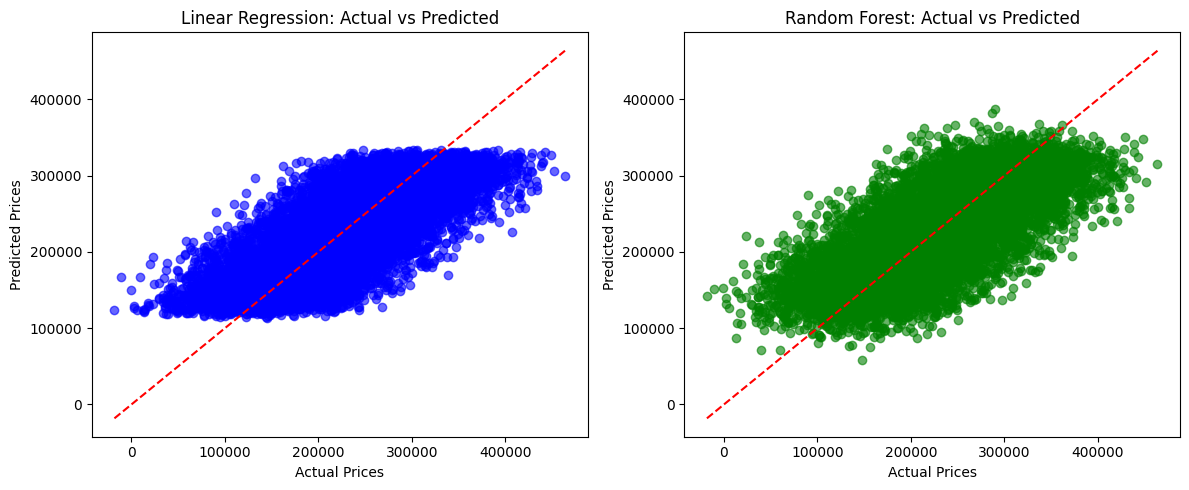

In [14]:
import matplotlib.pyplot as plt

# Plot Actual vs Predicted for Linear Regression
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(y_test, y_pred_lr, alpha=0.6, color="blue")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Linear Regression: Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")

# Plot Actual vs Predicted for Random Forest
plt.subplot(1,2,2)
plt.scatter(y_test, y_pred_rf, alpha=0.6, color="green")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Random Forest: Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")

plt.tight_layout()
plt.show()


In [15]:
# See first few rows
print(df.head())

# Info about columns
print(df.info())

# Statistical summary
print(df.describe())


   SquareFeet  Bedrooms  Bathrooms  YearBuilt          Price  \
0        2126         4          1       1969  215355.283618   
1        2459         3          2       1980  195014.221626   
2        1860         2          1       1970  306891.012076   
3        2294         2          1       1996  206786.787153   
4        2130         5          2       2001  272436.239065   

   Neighborhood_Suburb  Neighborhood_Urban  
0                False               False  
1                False               False  
2                 True               False  
3                False                True  
4                 True               False  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SquareFeet           50000 non-null  int64  
 1   Bedrooms             50000 non-null  int64  
 2   Bathrooms            50000 non-n

In [16]:
print("Missing values per column:")
print(df.isnull().sum())


Missing values per column:
SquareFeet             0
Bedrooms               0
Bathrooms              0
YearBuilt              0
Price                  0
Neighborhood_Suburb    0
Neighborhood_Urban     0
dtype: int64


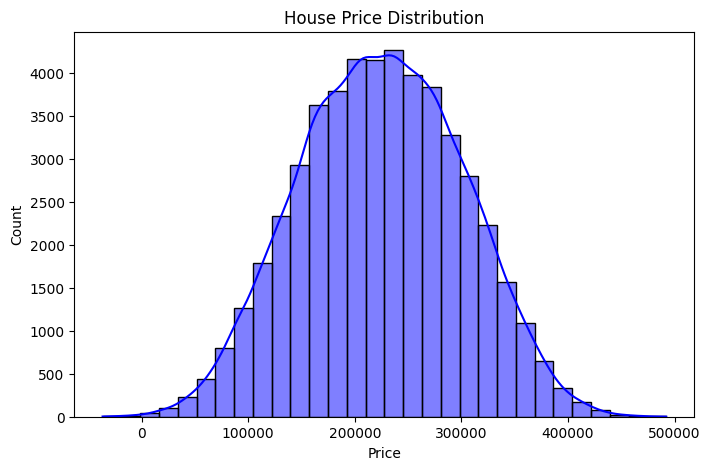

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.histplot(df['Price'], kde=True, bins=30, color='blue')
plt.title("House Price Distribution")
plt.show()


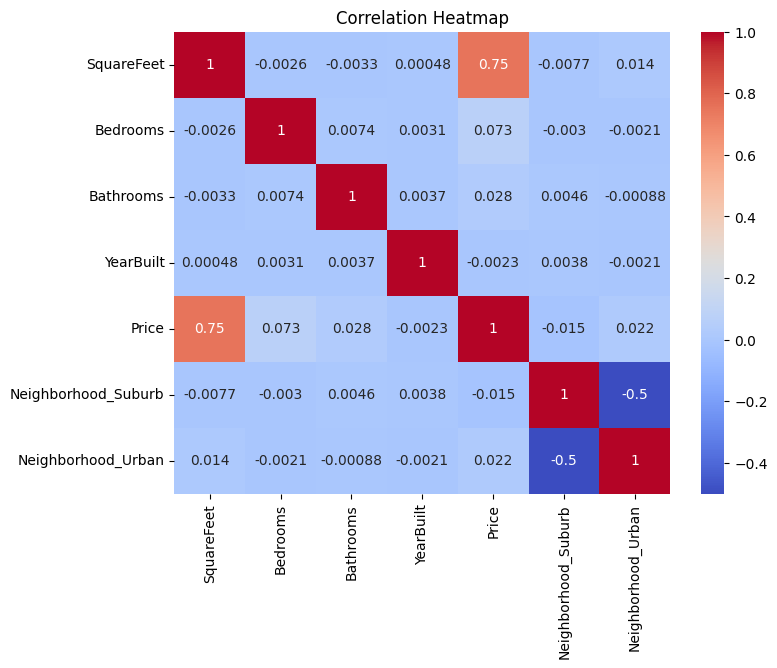

In [18]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


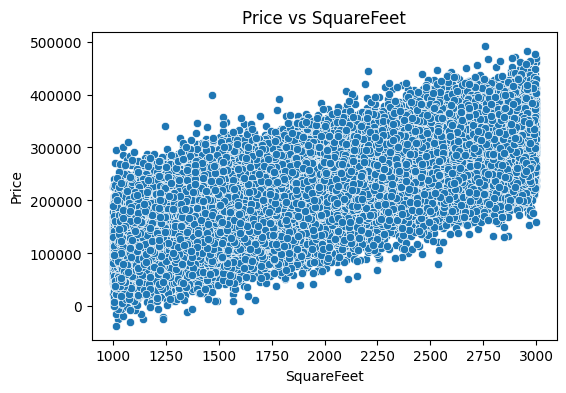

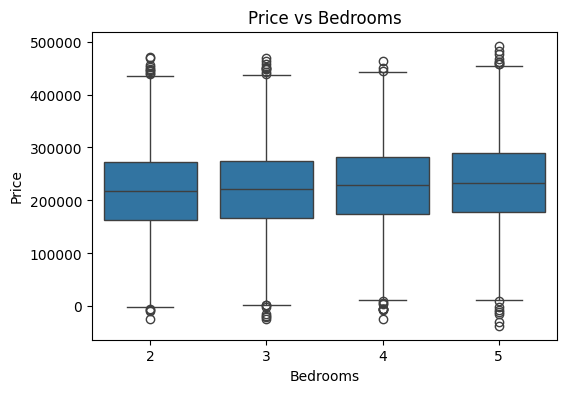

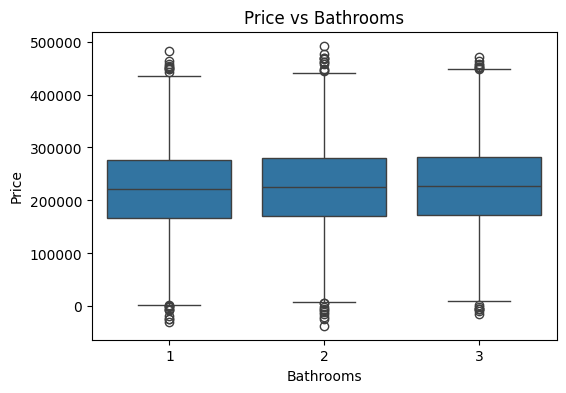

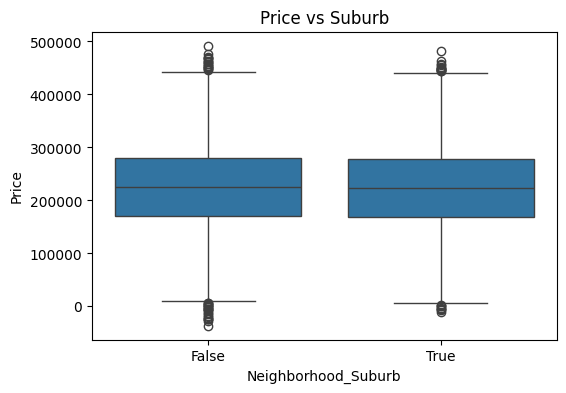

In [19]:
# Price vs SquareFeet
plt.figure(figsize=(6,4))
sns.scatterplot(x="SquareFeet", y="Price", data=df)
plt.title("Price vs SquareFeet")
plt.show()

# Price vs Bedrooms
plt.figure(figsize=(6,4))
sns.boxplot(x="Bedrooms", y="Price", data=df)
plt.title("Price vs Bedrooms")
plt.show()

# Price vs Bathrooms
plt.figure(figsize=(6,4))
sns.boxplot(x="Bathrooms", y="Price", data=df)
plt.title("Price vs Bathrooms")
plt.show()

# Price vs Neighborhood
plt.figure(figsize=(6,4))
sns.boxplot(x="Neighborhood_Suburb", y="Price", data=df)
plt.title("Price vs Suburb")
plt.show()


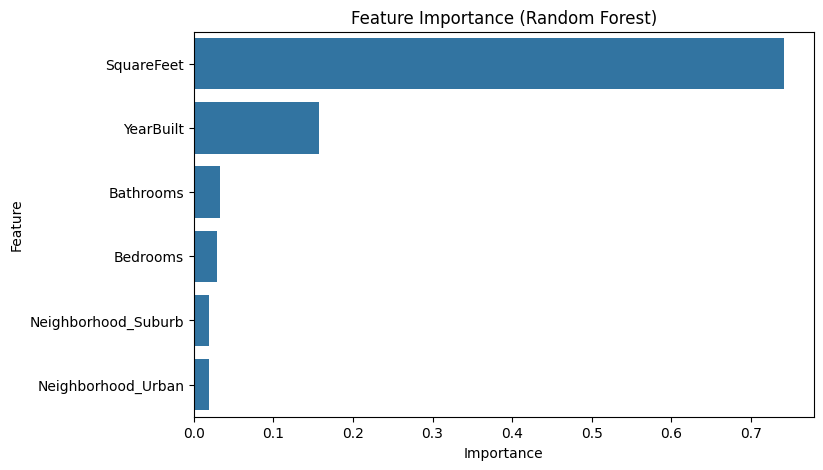

In [20]:
import pandas as pd
import numpy as np

# Get feature importance from Random Forest
importance = rf.feature_importances_

feature_importance = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": importance
}).sort_values(by="Importance", ascending=False)

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x="Importance", y="Feature", data=feature_importance)
plt.title("Feature Importance (Random Forest)")
plt.show()


In [21]:
!pip install xgboost


In [22]:
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor


In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Function to evaluate
def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    return [name, r2, mae, mse, rmse]

# Train and evaluate models
results = []

# Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
results.append(evaluate_model("Linear Regression", lr, X_train, y_train, X_test, y_test))

# Random Forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
results.append(evaluate_model("Random Forest", rf, X_train, y_train, X_test, y_test))

# Gradient Boosting
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
results.append(evaluate_model("Gradient Boosting", gb, X_train, y_train, X_test, y_test))

# XGBoost
xgb = XGBRegressor(n_estimators=100, random_state=42, objective="reg:squarederror")
results.append(evaluate_model("XGBoost", xgb, X_train, y_train, X_test, y_test))

# Put results in DataFrame
results_df = pd.DataFrame(results, columns=["Model", "R2 Score", "MAE", "MSE", "RMSE"])
print(results_df)


               Model  R2 Score           MAE           MSE          RMSE
0  Linear Regression  0.575563  39430.165338  2.436249e+09  49358.376911
1      Random Forest  0.518447  41884.608883  2.764089e+09  52574.607569
2  Gradient Boosting  0.574201  39474.747657  2.444068e+09  49437.517609
3            XGBoost  0.555518  40248.268512  2.551303e+09  50510.425660


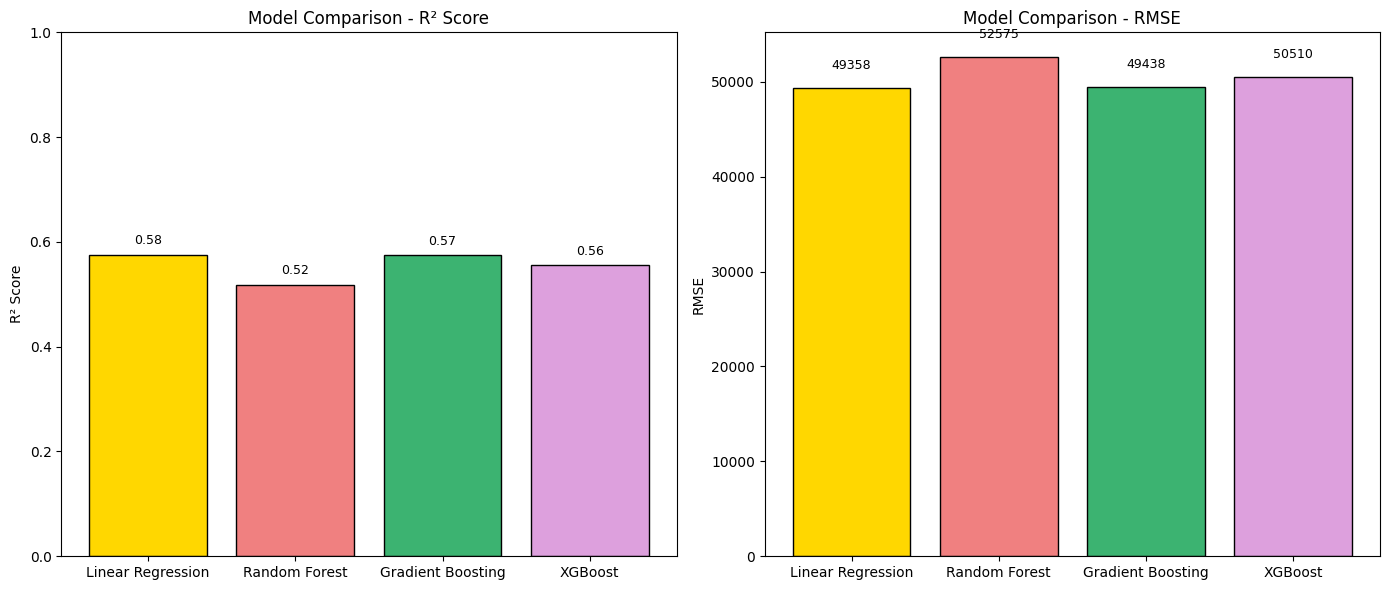

Best Model by R²: Linear Regression
Best Model by RMSE: Linear Regression


In [28]:
import matplotlib.pyplot as plt

# find best models
best_r2_idx = results_df["R2 Score"].idxmax()
best_rmse_idx = results_df["RMSE"].idxmin()

# basic colors
colors = ["skyblue", "lightcoral", "mediumseagreen", "plum"]

# highlight winners in gold
colors_r2 = colors.copy()
colors_r2[best_r2_idx] = "gold"

colors_rmse = colors.copy()
colors_rmse[best_rmse_idx] = "gold"

plt.figure(figsize=(14,6))

# --- R2 Score ---
plt.subplot(1,2,1)
bars = plt.bar(results_df["Model"], results_df["R2 Score"], color=colors_r2, edgecolor="black")
plt.title("Model Comparison - R² Score")
plt.ylabel("R² Score")
plt.ylim(0,1)

# add values
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()+0.02,
             f"{bar.get_height():.2f}", ha="center", fontsize=9)

# --- RMSE ---
plt.subplot(1,2,2)
bars = plt.bar(results_df["Model"], results_df["RMSE"], color=colors_rmse, edgecolor="black")
plt.title("Model Comparison - RMSE")
plt.ylabel("RMSE")

for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()+2000,
             f"{bar.get_height():.0f}", ha="center", fontsize=9)

plt.tight_layout()
plt.savefig("model_comparison.png", dpi=300, bbox_inches="tight")
plt.show()

print("Best Model by R²:", results_df.loc[best_r2_idx, "Model"])
print("Best Model by RMSE:", results_df.loc[best_rmse_idx, "Model"])


In [29]:
import pickle

# best model = linear regression
pickle.dump(lr, open("best_model.pkl", "wb"))


In [30]:
from google.colab import files

# download the file
files.download("best_model.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>